In [ ]:
!pip install face_recognition
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=f7229292d2aedb0987c5780290e38557d28e77aefbb0518986fe8aaecd8de6a9
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
import os

images_folder = '/content/drive/MyDrive/img'
images_name = [ img for img in os.listdir( images_folder ) ]

result=[]

for image_name in images_name:

    img = cv2.imread(os.path.join(images_folder , image_name))
    img_resized = cv2.resize(img, (400,400))
    rgb_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    faces_location = face_recognition.face_locations(rgb_img)

    result.append( ( len(faces_location) ,image_name , rgb_img  , faces_location ))

result_sorted= sorted(result , key= lambda x: x[0])

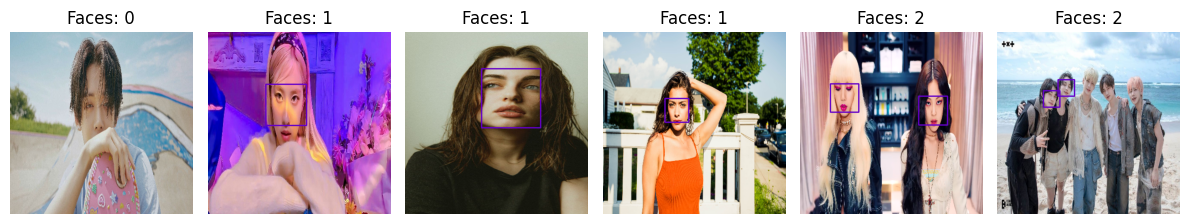

In [30]:

plt.figure(figsize=(12,4))

for index , (count , image_name , rgb_img , faces_location) in enumerate(result_sorted):

    img_copy = rgb_img.copy()

    for (top,right, bottom, left) in faces_location:

       cv2.rectangle(img_copy, (left,top), (right, bottom), (100, 0, 200), 2)

    plt.subplot(1 , len ( result_sorted), index+1)
    plt.imshow(img_copy)
    plt.title(f'Faces: {count}')
    plt.axis('off')


plt.tight_layout()
plt.show()